<a href="https://colab.research.google.com/github/Cordova0397/Carlos_Cordova_EC3/blob/master/Proyecto_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# ANalizando la Data

In [60]:
df = pd.read_csv('/content/drive/MyDrive/Proyecto2_DataSet/Mental Health Dataset.csv')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [62]:
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,2014-08-27 11:29:31,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,2014-08-27 11:31:50,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,2014-08-27 11:32:39,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,2014-08-27 11:37:59,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:36,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


Identificación y manejo de valores faltantes.

In [63]:
print(df.isnull().sum())

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64


In [64]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 287162 entries, 3 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                287162 non-null  object
 1   Gender                   287162 non-null  object
 2   Country                  287162 non-null  object
 3   Occupation               287162 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           287162 non-null  object
 6   treatment                287162 non-null  object
 7   Days_Indoors             287162 non-null  object
 8   Growing_Stress           287162 non-null  object
 9   Changes_Habits           287162 non-null  object
 10  Mental_Health_History    287162 non-null  object
 11  Mood_Swings              287162 non-null  object
 12  Coping_Struggles         287162 non-null  object
 13  Work_Interest            287162 non-null  object
 14  Social_Weakness          

Eliminamos las filas con valores nulos para asegurar que todos los registros estén completos y no introduzcan sesgos o errores en el análisis

**- Visualización de la distribución de género**

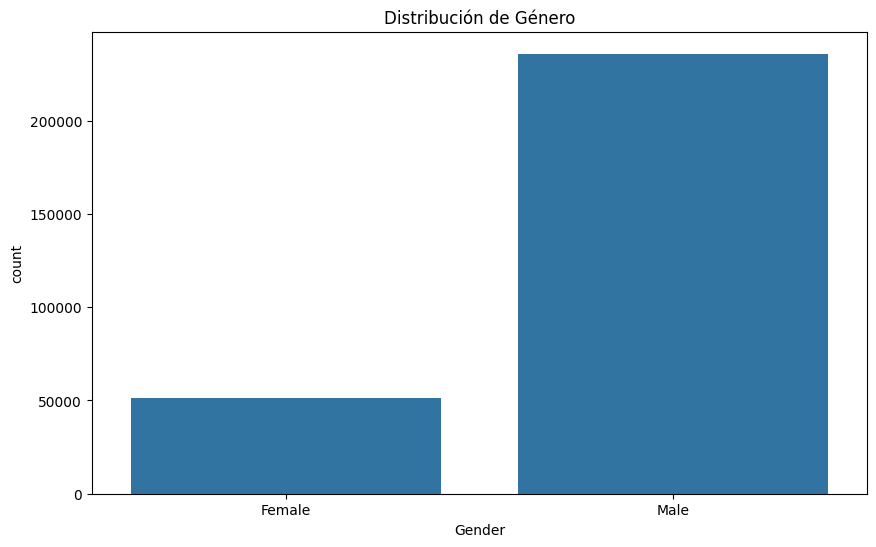

In [65]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender')
plt.title('Distribución de Género')
plt.show()


- Visualización de la relación entre tratamiento y antecedentes familiares

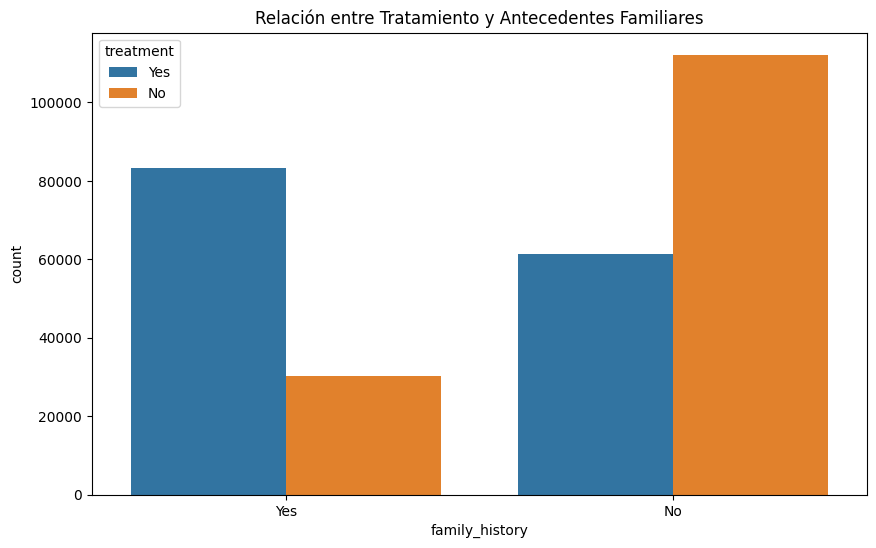

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='family_history', hue='treatment')
plt.title('Relación entre Tratamiento y Antecedentes Familiares')
plt.show()

- Visualización de la distribución de días en interiores

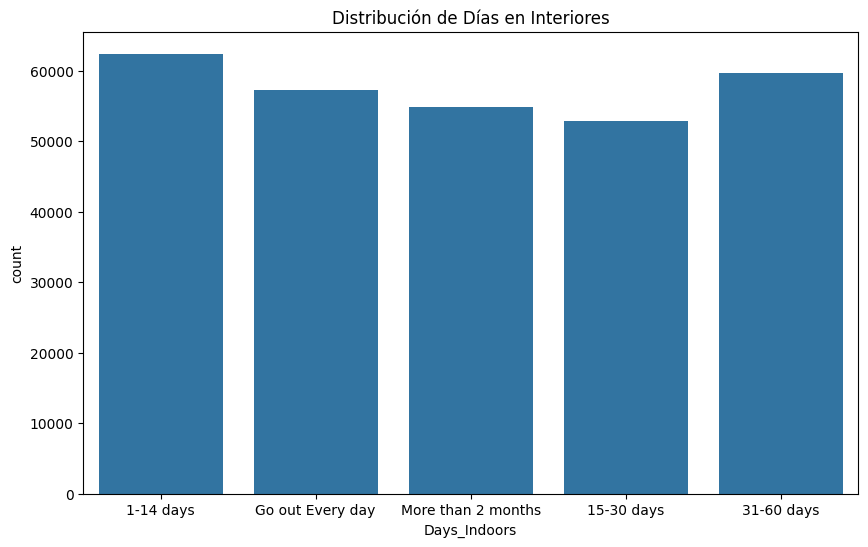

In [67]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Days_Indoors')
plt.title('Distribución de Días en Interiores')
plt.show()

* Visualización de la relación entre cambios de hábitos y estado de ánimo

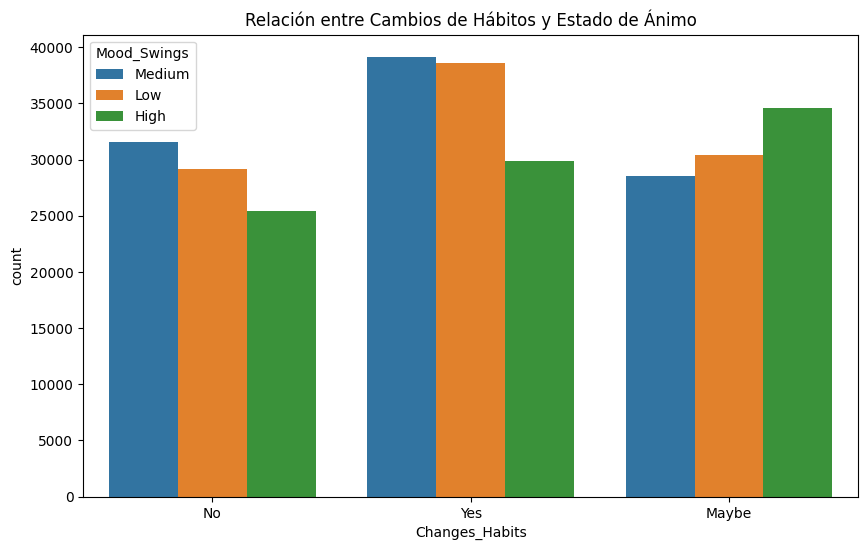

In [68]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Changes_Habits', hue='Mood_Swings')
plt.title('Relación entre Cambios de Hábitos y Estado de Ánimo')
plt.show()

# Modelado

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

Convertir variables categóricas a numéricas usando LabelEncoder

In [70]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

Definir las características (X) y la variable objetivo (y)

In [71]:
X = df.drop('treatment', axis=1)
y = df['treatment']

Dividir los datos en conjuntos de entrenamiento y prueba

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Entrenar un modelo de RandomForestClassifier

In [73]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
y_pred = model.predict(X_test)

Reporte de clasificación y la matriz de confusión

In [75]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87     42726
           1       0.88      0.87      0.87     43423

    accuracy                           0.87     86149
   macro avg       0.87      0.87      0.87     86149
weighted avg       0.87      0.87      0.87     86149

[[37476  5250]
 [ 5673 37750]]


## - Interpretación

* Precisión Global (Accuracy): El modelo tiene una precisión global del 87%, lo cual es bastante bueno, indicando que el modelo clasifica correctamente la mayoría de las instancias.

* Balance de Clases: Las métricas de precisión, recall y F1-score son muy similares para ambas clases (0 y 1), lo que sugiere que el modelo maneja bien el balance de clases.

* Errores de Clasificación:
** Falsos Positivos: 5250 instancias fueron clasificadas
erróneamente como 1 cuando en realidad eran 0.
** Falsos Negativos: 5673 instancias fueron clasificadas erróneamente como 0 cuando en realidad eran 1.